### Exercise 3. Random Forest Regression Model
#### Import the dataset from https://drive.google.com/file/d/1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_/view
#### Question 12. Take a look at the first five rows.
#### Question 13. Is there any problem with the data?
#### Question 14. Set ‘Petrol_Consumption’ as the target variable. Scale the features.
#### Question 15. Use a random forest regression model. Does it perform better than a Ridge regression Model? Why?
#### Question 16. Provide the mean absolute error for the Ridge Regression and RF models.
#### Question 17. Provide the mean squared error for the Ridge Regression and RF models.
#### Question 18. Provide the root mean squared error for the Ridge Regression and RF models.
#### Question 19. Provide the feature importance values for the RF model. Which feature is the most important? Do you get the same importance with the Ridge Regression model? Explain why.
#### Question 20. Provide the first 10 predictions from both models and graph them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Logistic Regression | Load the libraries
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download database
petrol = pd.read_csv('C:/Users/dansa/Documents/petrol_consumption.csv')
petrol.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


#### Answer to Q12: First five rows of the data is shown above

In [3]:
petrol.count()

Petrol_tax                      48
Average_income                  48
Paved_Highways                  48
Population_Driver_licence(%)    48
Petrol_Consumption              48
dtype: int64

In [4]:
petrol.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

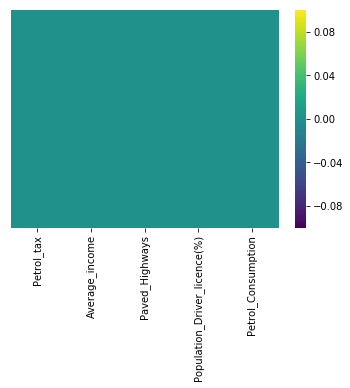

In [5]:
# Use heatmap to determine if there are missing data
sns.heatmap(petrol.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [6]:
#Data check
print(petrol.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB
None


#### Answer to Q13: The count function and the heatmap shows that there is no missing data or NaN in the dataset, so we can conclude that the dataset is clean

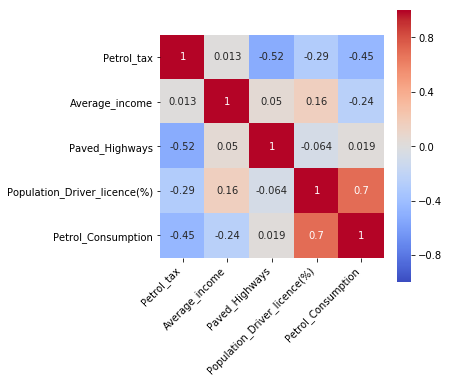

In [7]:
#Data is cleaned, continue to explore the dataset
plt.figure(figsize=(5,5))
corr = petrol.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,
    annot=True)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

#### The highest correlation coefficient is 0.70 between population driver license and petrol consumption.

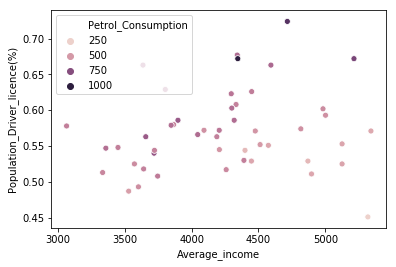

In [8]:
ax = sns.scatterplot(x="Average_income", y="Population_Driver_licence(%)", hue="Petrol_Consumption", data=petrol)
#Reference: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

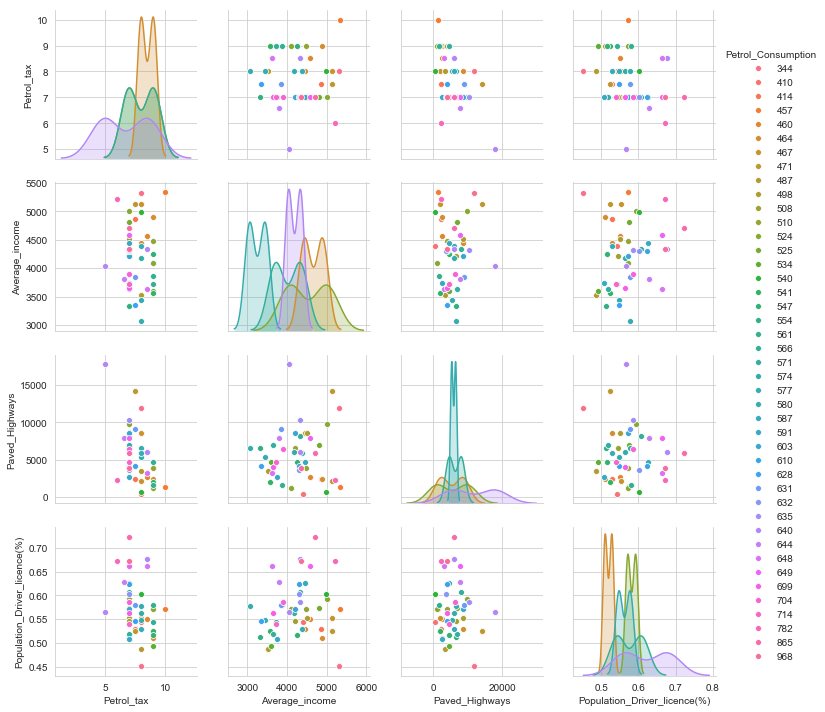

In [9]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.pairplot(petrol, hue = 'Petrol_Consumption',vars = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)'] )

In [10]:
features=petrol.iloc[:,0:4]
features.head()
names = petrol.columns
print(names)

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')


#### Answer to Q14: Petrol consumption set as the target variable and features are scaled

In [11]:
target=petrol.iloc[:,4]
target.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, random_state=0) 

In [13]:
#copying X_train in to dataframe to use it in plot
df_X_train=pd.DataFrame(X_train)
df_Y_train=pd.DataFrame(Y_train)
df_X_test=pd.DataFrame(X_test)
df_Y_test=pd.DataFrame(Y_test)

In [14]:
# Load the standard scaler
sc = StandardScaler()

# Compute the mean and standard deviation based on the training data
#sc.fit(X_train)

# Scale the training data to be of mean 0 and of unit variance
X_train_scaled = sc.fit_transform(X_train)

# Scale the test data to be of mean 0 and of unit variance
X_test_scaled = sc.transform(X_test)
#https://chrisalbon.com/machine_learning/preprocessing_structured_data/preprocessing_iris_data/

In [15]:
df_X_train_scaled=pd.DataFrame(X_train_scaled,columns=df_X_train.columns)
df_X_test_scaled=pd.DataFrame(X_test_scaled,columns=df_X_test.columns)

#### Answer Q15: Use a random forest regression model and ridge regression model to determine which performs better

#### Ridge Regression

In [16]:
clf1=GridSearchCV(estimator=Ridge(),
        param_grid=dict(alpha=np.array([1,0.1,0.01,0.001,0.0001,0])))


clf1.fit(X_train_scaled,Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
bp1=(clf1.best_params_)
bp1

{'alpha': 1.0}

In [18]:
lm_ridge=Ridge(alpha=bp1['alpha'])
lm_ridge.fit(X_train_scaled,Y_train)
pred_ridge = lm_ridge.predict(X_test_scaled)
pred_ridge[:]
#print (sorted(zip(map(lambda x: round(x, 2), lm_ridge.coef_), names), reverse=True))

array([474.70976701, 550.34829003, 594.16595025, 574.70853024,
       653.78725318, 648.11599349, 519.89810774, 671.35842945,
       501.69063036, 501.8336146 , 418.47073625, 591.39920509])

In [19]:
#calculate errors
predicted_lmridge_error = cross_val_predict(lm_ridge, features, target, cv=10)

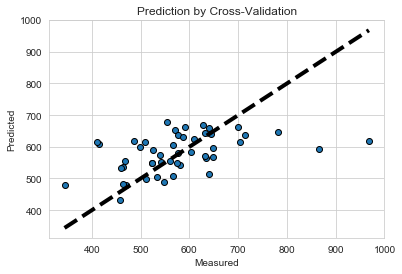

In [20]:
# Create a graph of the predicted versus cross-validated errors
fig, ax = plt.subplots()
ax.scatter(target, predicted_lmridge_error, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction by Cross-Validation', fontdict=None, loc='center', pad=None)
plt.show()

#### Random Forest Regression

In [21]:
clf2=GridSearchCV(estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)


clf2.fit(X_train_scaled,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(3, 7), 'n_estimators': (10, 50, 100, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [22]:
bp2=(clf2.best_params_)
bp2

{'max_depth': 5, 'n_estimators': 10}

In [23]:
randomFT = RandomForestRegressor(n_estimators=bp2['n_estimators'],max_depth=bp2['max_depth'])
randomFT.fit(X_train_scaled, Y_train)
pred_random = randomFT.predict(X_test_scaled)
#print (sorted(zip(map(lambda x: round(x, 2), randomFT.feature_importances_), names), reverse=True))
pred_random [:]

array([570.48333333, 491.83047619, 601.57333333, 614.74      ,
       641.89952381, 633.63404762, 573.20833333, 582.55785714,
       509.07047619, 481.33047619, 461.89047619, 614.74      ])

In [24]:
#calculate errors
predicted_randomFT_error = cross_val_predict(randomFT, features, target, cv=10)

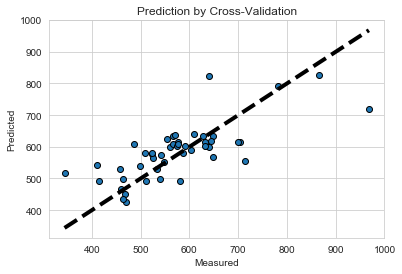

In [25]:
# Create a graph of the predicted versus cross-validated errors
fig, ax = plt.subplots()
ax.scatter(target, predicted_randomFT_error, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction by Cross-Validation', fontdict=None, loc='center', pad=None)
plt.show()

#### Answer Q16-Q18: The mean absolute error, the mean squared error and the root mean squared error for the ridge and random forest models are shown below.

In [26]:
print("Ridge Regression the mean absolute error is", np.round(metrics.mean_absolute_error(Y_test, pred_ridge),2))
print("Ridge Regression the mean squared error is", np.round(metrics.mean_squared_error(Y_test, pred_ridge),2))
print("Ridge Regression the root mean squared error is", np.round(np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)),2))

Ridge Regression the mean absolute error is 56.1
Ridge Regression the mean squared error is 4350.9
Ridge Regression the root mean squared error is 65.96


In [27]:
print("Random Forest Regression the mean absolute error is", np.round(metrics.mean_absolute_error(Y_test, pred_random),2))
print("Random Forest Regression the mean squared error is", np.round(metrics.mean_squared_error(Y_test, pred_random),2))
print("Random Forest Regression the root mean squared error is", np.round(np.sqrt(metrics.mean_squared_error(Y_test, pred_random)),2))

Random Forest Regression the mean absolute error is 51.93
Random Forest Regression the mean squared error is 3536.43
Random Forest Regression the root mean squared error is 59.47


#### Question Q19: The feature importance values for the RF model and Ridge model is shown below

In [28]:
feature_list = list(names)
# Get numerical feature importances
importances = list(lm_ridge.coef_)
# List of tuples with variable and importance
feature_importances = [(features, round(importance, 2)) for features, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Coefficients: {}'.format(*pair)) for pair in feature_importances];

Variable: Population_Driver_licence(%) Coefficients: 73.14
Variable: Paved_Highways       Coefficients: -19.81
Variable: Average_income       Coefficients: -35.57
Variable: Petrol_tax           Coefficients: -42.68


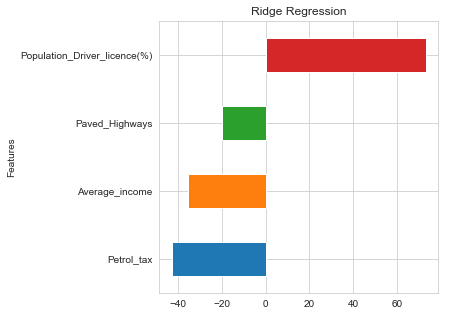

In [29]:
# Evaluate the model
plt.figure(figsize=(5,5))
ft_importance=pd.Series(lm_ridge.coef_, index=features.columns)
ft_importance.plot(kind='barh')
plt.title('Ridge Regression')
plt.ylabel('Features')
plt.show();

In [30]:
feature_list = list(names)
# Get numerical feature importances
importances = list(randomFT.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(features, round(importance, 2)) for features, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Population_Driver_licence(%) Importance: 0.58
Variable: Average_income       Importance: 0.33
Variable: Petrol_tax           Importance: 0.06
Variable: Paved_Highways       Importance: 0.04


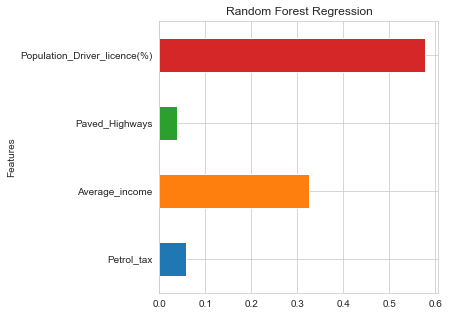

In [31]:
# Evaluate the model
plt.figure(figsize=(5,5))
ft_importance=pd.Series(randomFT.feature_importances_, index=features.columns)
ft_importance.plot(kind='barh')
plt.title('Random Forest Regression')
plt.ylabel('Features')
plt.show();

#### Answer Q20: The first 10 predictions from both models and graph them

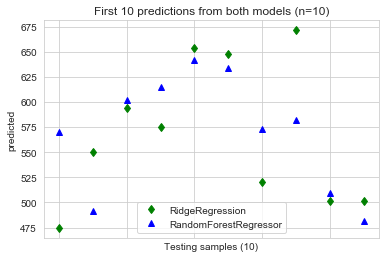

In [32]:
xt = X_test_scaled[:10]

plt.figure()
plt.plot(lm_ridge.predict(xt), 'gd', label='RidgeRegression')
plt.plot(randomFT.predict(xt), 'b^', label='RandomForestRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('Testing samples (10)')
plt.legend(loc="best")
plt.title('First 10 predictions from both models (n=10)')
plt.show()